In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate #for testing and training
from sklearn.naive_bayes import GaussianNB # to import gaussian Naive Bayes algo
from sklearn.metrics import confusion_matrix, classification_report # to imporve performance
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif # for best selection


IMPORTING DATASET

In [3]:
data=pd.read_csv("creditcard.csv")

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
print('Columns:',list(data))
print('Number of columns:',len(list(data)))

Columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']
Number of columns: 31


In [7]:
n_genuine=len(data[data['Class']==0])
n_fraud=len(data[data['Class']==1])

In [8]:
n_genuine


284315

In [9]:
n_fraud

492

Number of Geniuine Transactions : 284315
Number of Fraud Transactions : 492


([<matplotlib.patches.Wedge at 0x230e37eb860>,
 [Text(-1.09998380137016, 0.0059696501784341355, 'Geniuine'),
  Text(1.0999838018177286, -0.005969567707642625, 'Fraud')])

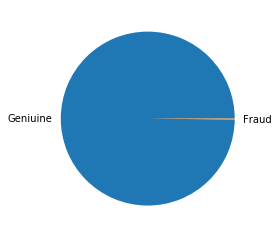

In [10]:
print('Number of Geniuine Transactions :',n_genuine)
print('Number of Fraud Transactions :',n_fraud)
plt.pie([n_genuine,n_fraud], labels=['Geniuine','Fraud'],radius=1)

In [11]:
X,y=data.iloc[:,:-1],data.iloc[:,-1]

In [12]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [13]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [14]:
k=10
k_best= SelectKBest(f_classif,k=k)
k_best.fit(X,y)

SelectKBest(k=10, score_func=<function f_classif at 0x00000230E36C31E0>)

In [15]:
mask=k_best.get_support()
not_mask=np.logical_not(mask) #like a complement to the set of best features set

all_features=np.array(list(X))

best_features=all_features[mask]
bad_features=all_features[not_mask]

print('Best Features :',best_features)
print('Bad Features :',bad_features)

Best Features : ['V3' 'V4' 'V7' 'V10' 'V11' 'V12' 'V14' 'V16' 'V17' 'V18']
Bad Features : ['Time' 'V1' 'V2' 'V5' 'V6' 'V8' 'V9' 'V13' 'V15' 'V19' 'V20' 'V21' 'V22'
 'V23' 'V24' 'V25' 'V26' 'V27' 'V28' 'Amount']


In [16]:
X=X.drop(bad_features,axis=1)
X.head()

,V3,V4,V7,V10,V11,V12,V14,V16,V17,V18
0,2.536347,1.378155,0.239599,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791
1,0.166480,0.448154,-0.078803,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361
2,1.773209,0.379780,0.791461,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359
3,1.792993,-0.863291,0.237609,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775
4,1.548718,0.403034,0.592941,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195


In [17]:
X.head()

,V3,V4,V7,V10,V11,V12,V14,V16,V17,V18
0,2.536347,1.378155,0.239599,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791
1,0.166480,0.448154,-0.078803,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361
2,1.773209,0.379780,0.791461,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359
3,1.792993,-0.863291,0.237609,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775
4,1.548718,0.403034,0.592941,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195


In [18]:
def plot_fraud_genuine(features,data):
    plt_index=0
    plt.figure(figsize=(10,10))
    plt.subplots_adjust(top = 0.99,bottom=0.01,hspace=1.5,wspace=0.4)
    for feature in features:
        plt_index+=1
        feature_data=pd.concat([data[features], data['Class']],axis=1)
        fraud=feature_data[data['Class']==1]
        genuine=feature_data[data['Class']==0]
        if len(genuine>10000):
            genuine=genuine[::100]
        plt.subplot(5,5,plt_index)
        sns.distplot(fraud[feature])
        sns.distplot(genuine[feature])
        plt.title(feature)

C:\Users\Manan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


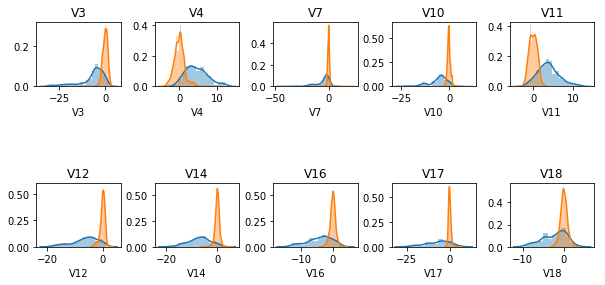

In [19]:
plot_fraud_genuine(best_features,data)

In the above figure we can see that the graphs completely distiguishes between fraud and correct data , one graph depicts the fraud while other correct. 
Now , in the fig shown below, both the graphs overlap over each other so it is difficult to distiguish between correct and fraudulent data, so these features can't be used to train the machine. 

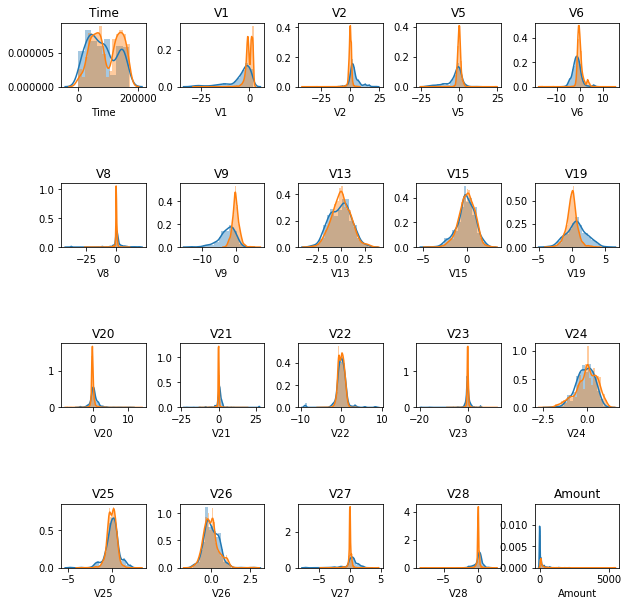

In [20]:
plot_fraud_genuine(bad_features,data) #this data cant be used to train the machine

In [21]:
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.2) 
# here the test_size = 20 signifies that 20% of data is for testing and rest for training

In [22]:
nb= GaussianNB() # imported through sklearn library
cv_results=cross_validate(nb,x_train,y_train,cv=10,
                         scoring='recall',
                         return_train_score=True,
                         return_estimator=True)

In [23]:
print('Training scores from each fold:', cv_results['train_score'])
max_score_index= np.argmax(cv_results['train_score'])
best_estimator=cv_results['estimator'][max_score_index]

Training scores from each fold: [0.85014409 0.85014409 0.85302594 0.85878963 0.85590778 0.85590778
 0.8591954  0.85057471 0.85344828 0.84482759]


In [24]:
#Prediction
def display_results(estimator,x,y):
    predicted=estimator.predict(x)
    cm=confusion_matrix(y,predicted)
    report=classification_report(y,predicted)
    print(report)
    plt.figure(figsize=(8,6))
    plt.title('Fraud Detection')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    sns.heatmap(cm,annot=True)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56856
           1       0.16      0.84      0.27       106

   micro avg       0.99      0.99      0.99     56962
   macro avg       0.58      0.92      0.63     56962
weighted avg       1.00      0.99      0.99     56962



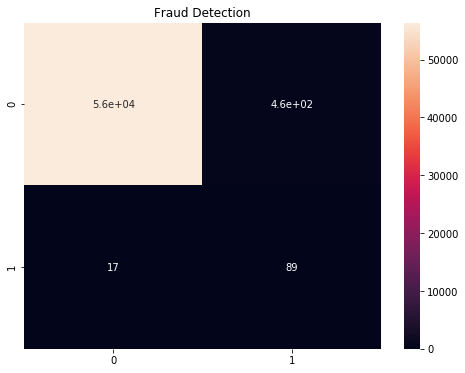

In [26]:
display_results(best_estimator,x_test,y_test) 

In [ ]:
Thanks 